## Loan Eligibility Prediction

### Overview of the Loan Prediction Project

The loan prediction project aims to create a machine learning model that can predict whether a loan application will be approved or not based on various features of the applicants. This involves several key steps including data collection, preprocessing, model training, evaluation, and results presentation.

#### 1. Data Collection
The dataset used in this project includes historical loan application data. Key features include:
- **ApplicantIncome**: Income of the loan applicant.
- **CoapplicantIncome**: Income of the co-applicant.
- **LoanAmount**: The amount of the loan requested.
- **Loan_Amount_Term**: The term of the loan in months.
- **Credit_History**: Credit history of the applicant (a binary variable indicating if they have credit history).
- **Gender, Marital_Status, Education, Self_Employed**: Categorical variables indicating personal details.
- **Property_Area**: The area where the property is located.
- **Loan_Status**: The target variable indicating if the loan was approved or not (Yes/No).

#### 2. Data Preprocessing
Data preprocessing involves cleaning and transforming the data to make it suitable for analysis:
- **Handling Missing Values**: Filling or imputing missing values in the dataset.
- **Label Encoding**: Converting categorical variables into numerical values using techniques like label encoding.
- **Feature Scaling**: Standardizing the numerical features to ensure that they have a mean of 0 and a standard deviation of 1.

#### 3. Model Training
Logistic regression is used for training the model:
- **Training the Model**: The model is trained on the training dataset using logistic regression, which is suitable for binary classification problems like this one.
- **Feature Selection**: Initially, all features are considered, but for visualization, only two features are selected (e.g., ApplicantIncome and LoanAmount).

#### 4. Model Evaluation
Evaluating the model involves:
- **Predictions**: Generating predictions on the test dataset.
- **Confusion Matrix**: Creating a confusion matrix to visualize the performance of the model in terms of true positives, true negatives, false positives, and false negatives.
- **Accuracy**: Calculating the accuracy of the model, which is the ratio of correctly predicted instances to the total instances.
- **ROC Curve and AUC**: Plotting the Receiver Operating Characteristic (ROC) curve and calculating the Area Under the Curve (AUC) to assess the model's discriminative ability.

#### 5. Results Presentation
The results are presented in a clear and interpretable manner:
- **Prediction Table**: A table showing the actual vs. predicted loan statuses along with the applicant features.
- **Confusion Matrix Plot**: A heatmap of the confusion matrix to visually represent the performance.
- **Accuracy Score**: The overall accuracy of the model.
- **ROC Curve**: The ROC curve along with the AUC value.

#### 6. Conclusion
The project concludes with:
- **Summary of Model Performance**: Summarizing how well the logistic regression model predicts loan approvals.
- **Implications for Financial Institutions**: Discussing how this model can aid financial institutions in automating and improving their loan approval processes.
- **Future Improvements**: Suggesting potential improvements such as using more complex models, including additional features, or performing more detailed hyperparameter tuning.



### Objective

The objective of this project is to build different machine learning model to predict the loan approval status of applicants based on their financial and personal information.

### Table of Contents
##### Step 1. Importing Necessary Libaries
##### Step 2. Gathering Data
##### Step 3. Eploratory Data Analysis (EDA)
###### Step 3.1. Counting and Sum the categorical columns
###### Step 3.2. Visualization
##### Step 4. Dealing with Null Values
###### Step 4.1. Converting categorical variable with numerical values for Boolean types of columns
###### Step 4.2. Label Encoding
###### step 4.3. Filling the null values
##### Step 5. Dropping the unnecessary columns
##### Step 6. Corralation Matrix Visualization
##### Step 7. ML Modeling
###### Step 7.1. Extracting Dependent and Independent Variables
###### Step 7.2. Decision Tree Regressor without model validation  
###### Step 7.3. Mean Absolute Error
###### Step 7.4. Model Validation
###### Step 7.5. Feature Scaling
###### Step 7.6. Decision Tree Regressor after Model Validation and Feature Scaling
###### Step 7.7. Checking the Accuracy
###### Step 7.8. Logistic Regression
###### Step 7.9. Support Vector Machine
##### Step 8. Conclusion

### Step 1. Importing Necessary Libaries

In [55]:
import numpy as np
import pandas as pd
import warnings

# Ignore all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Step 2. Gathering Data

In [56]:
loan_train=pd.read_csv('loan-train.csv')
loan_test=pd.read_csv('loan-test.csv')

In [57]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
loan_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### Step 3. Exploratory Data Analysis

Step 3.1. Counting and Sum the categorical columns

In [60]:
def explore_object_type(df ,feature_name):  
    if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [61]:
explore_object_type(loan_train, 'Gender')

Gender
Male      489
Female    112
Name: count, dtype: int64


In [62]:
explore_object_type(loan_train, 'Loan_ID')

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64


In [63]:
loan_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [64]:
explore_object_type(loan_train, 'Married')

Married
Yes    398
No     213
Name: count, dtype: int64


In [65]:
explore_object_type(loan_train, 'Dependents')

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


In [66]:
explore_object_type(loan_train, 'Education')

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


In [67]:
explore_object_type(loan_train, 'Self_Employed')

Self_Employed
No     500
Yes     82
Name: count, dtype: int64


In [68]:
explore_object_type(loan_train, 'Property_Area')

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


In [69]:
explore_object_type(loan_train, 'Loan_Status')

Loan_Status
Y    422
N    192
Name: count, dtype: int64


### Step 3.2. Visualization 

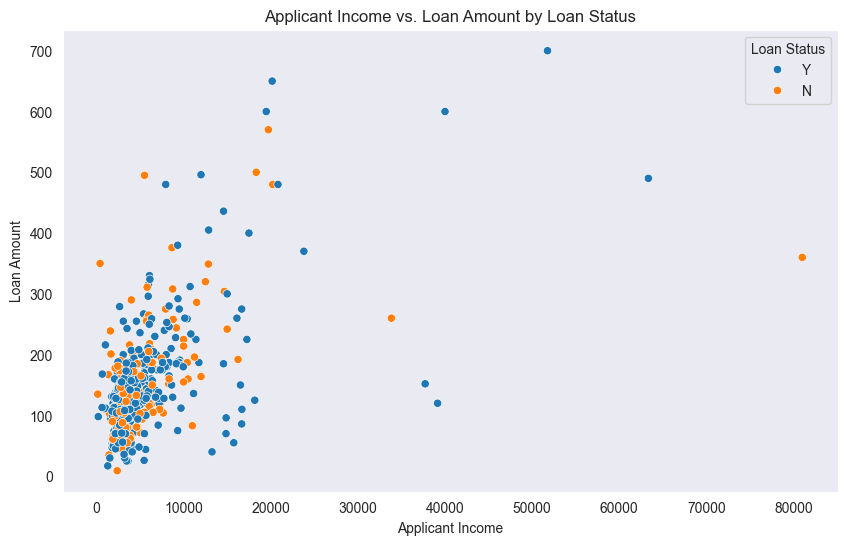

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with hue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', hue='Loan_Status', data=loan_train)
plt.title('Applicant Income vs. Loan Amount by Loan Status')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.legend(title='Loan Status')
plt.show()


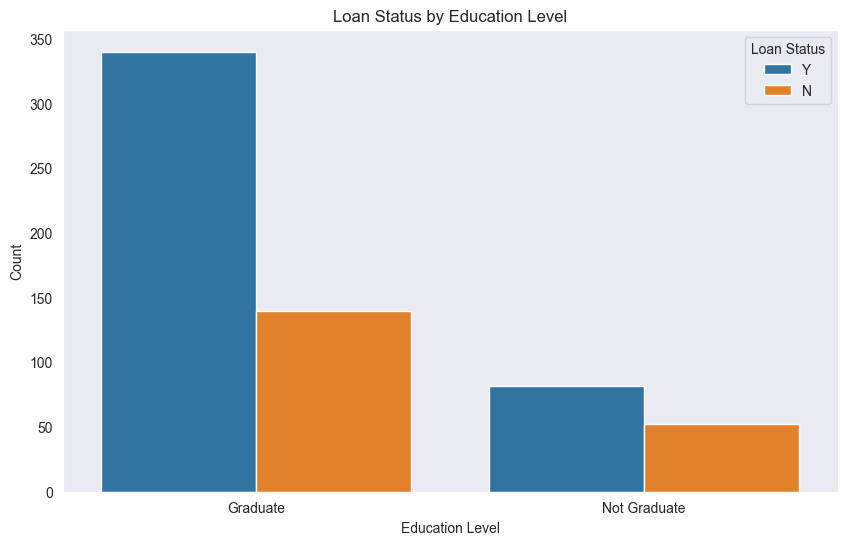

In [71]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Education', hue='Loan_Status', data=loan_train)
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

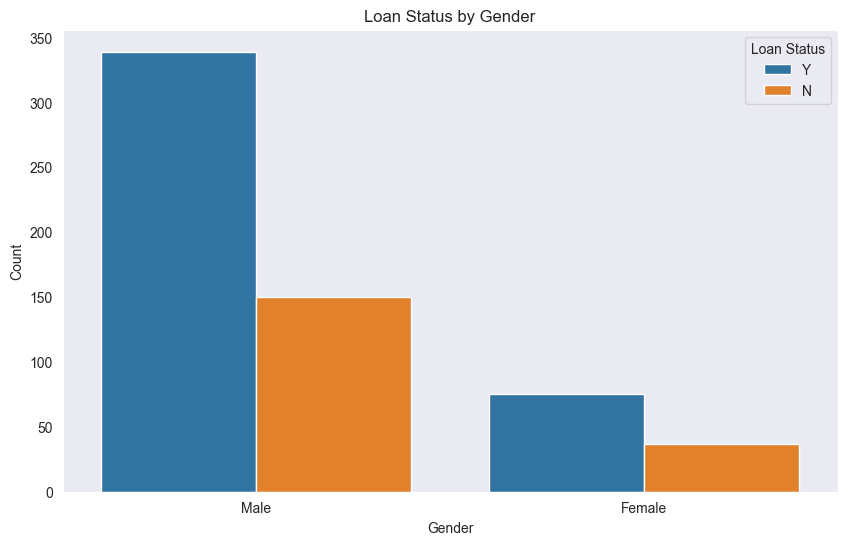

In [72]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Gender', hue='Loan_Status', data=loan_train)
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

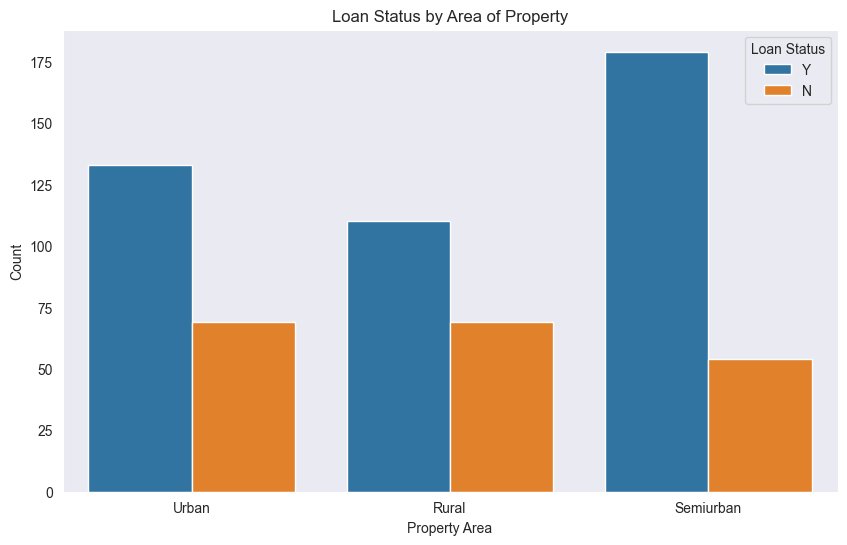

In [73]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Property_Area', hue='Loan_Status', data=loan_train)
plt.title('Loan Status by Area of Property')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

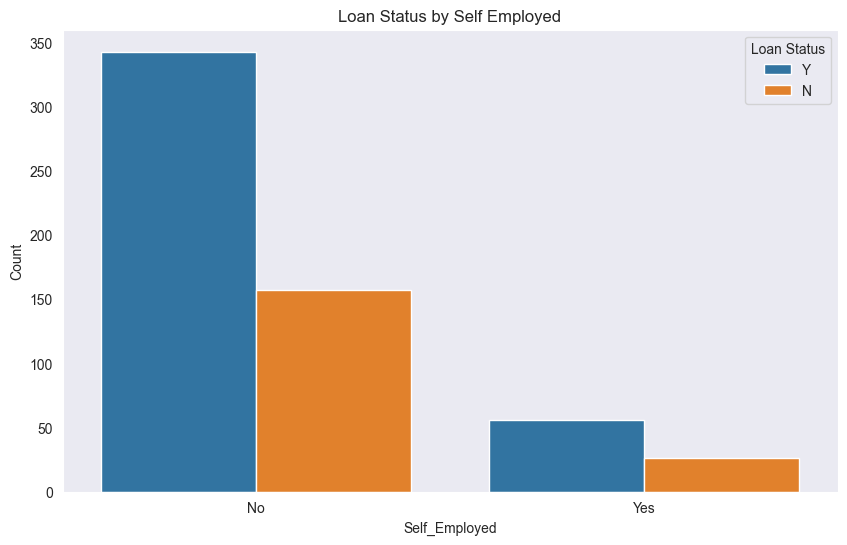

In [74]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Self_Employed', hue='Loan_Status', data=loan_train)
plt.title('Loan Status by Self Employed')
plt.xlabel('Self_Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

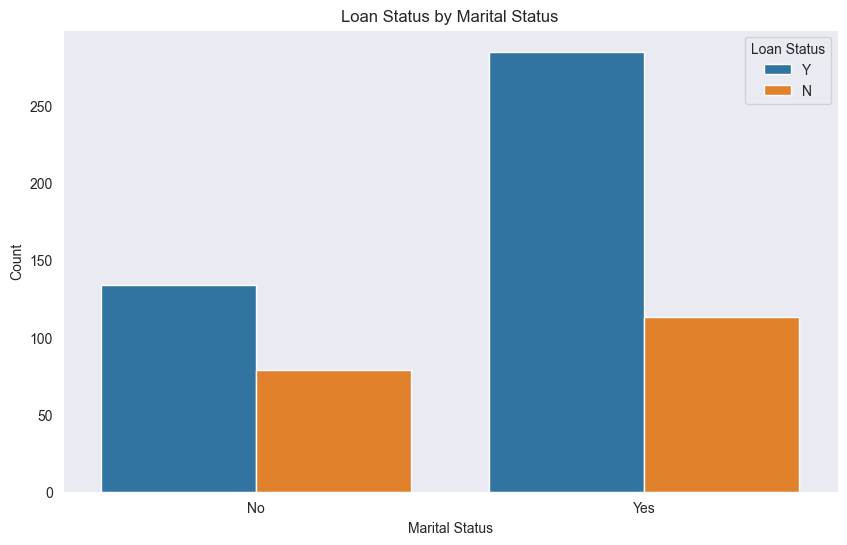

In [75]:
# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Married', hue='Loan_Status', data=loan_train)
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Loan Status')
plt.show()

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline


import seaborn as sns
sns.set_style('dark')

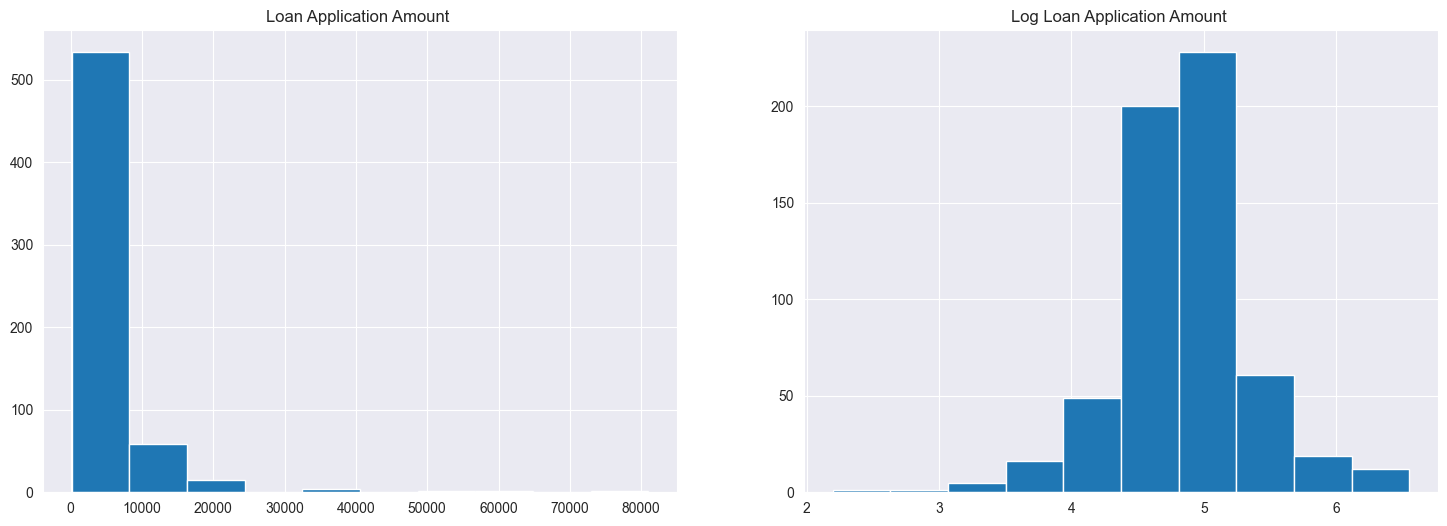

In [77]:
plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)


loan_train['ApplicantIncome'].hist(bins=10)
plt.title("Loan Application Amount ")

plt.subplot(1, 2, 2)
plt.grid()
plt.hist(np.log(loan_train['LoanAmount']))
plt.title("Log Loan Application Amount ")

plt.show()

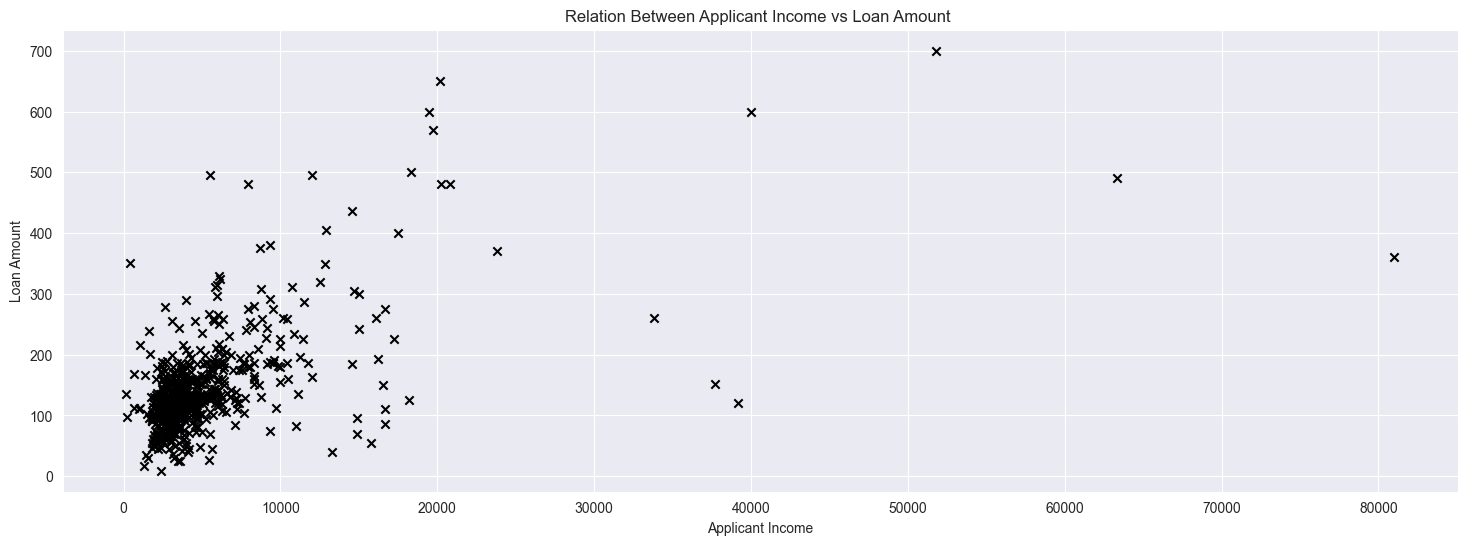

In [78]:
plt.figure(figsize=(18, 6))
plt.title("Relation Between Applicant Income vs Loan Amount ")

plt.grid()
plt.scatter(loan_train['ApplicantIncome'] , loan_train['LoanAmount'], c='k', marker='x')
plt.xlabel("Applicant Income")
plt.ylabel("Loan Amount")
plt.show()

In [79]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Step 4. Dealing with Null Values

We need to fill null values with `mean` and `median` using `missingno` package

In [80]:
import missingno as msno


In [81]:
print('sum of available null values')
loan_train.isna().sum()

sum of available null values


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Step 4.1 converting categorical variable with numerical values for Boolean types of columns

In [82]:
loan_train.Loan_Status = loan_train.Loan_Status.replace({"Y": 1, "N" : 0})
# loan_test.Loan_Status = loan_test.Loan_Status.replace({"Y": 1, "N" : 0}) 

loan_train.Gender = loan_train.Gender.replace({"Male": 1, "Female" : 0})
loan_test.Gender = loan_test.Gender.replace({"Male": 1, "Female" : 0})

loan_train.Married = loan_train.Married.replace({"Yes": 1, "No" : 0})
loan_test.Married = loan_test.Married.replace({"Yes": 1, "No" : 0})

loan_train.Self_Employed = loan_train.Self_Employed.replace({"Yes": 1, "No" : 0})
loan_test.Self_Employed = loan_test.Self_Employed.replace({"Yes": 1, "No" : 0})


Step 4.2 Here, `Property_Area`, `Dependents` and `Education` has multiple values so now we can use `LabelEncoder` from `sklearn` package

In [83]:
from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents']
le = LabelEncoder()
for col in feature_col:
    loan_train[col] = le.fit_transform(loan_train[col])
    loan_test[col] = le.fit_transform(loan_test[col])

In [84]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1.0,0.0,0,0,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,LP001003,1.0,1.0,1,0,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1.0,1.0,0,0,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1.0,1.0,0,1,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1.0,0.0,0,0,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0.0,0.0,0,0,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1.0,1.0,3,0,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1.0,1.0,1,0,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1.0,1.0,2,0,0.0,7583,0.0,187.0,360.0,1.0,2,1


step 4.3 Filling the null values

In [85]:
loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].mean(), inplace=True) # Mean
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].mean(), inplace=True) # Mean

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mean(), inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mean(), inplace=True)

loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True)
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)

loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].mode()[0], inplace=True)
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].mode()[0], inplace=True)

In [86]:
loan_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Step 5. Dropping the unnecessary columns

In [87]:
loan_train=loan_train.drop(['Dependents'], axis=1)

In [88]:
loan_train=loan_train.drop(['Loan_ID'], axis=1)

In [89]:
loan_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


Step 6. Corralation Matrix Visualization

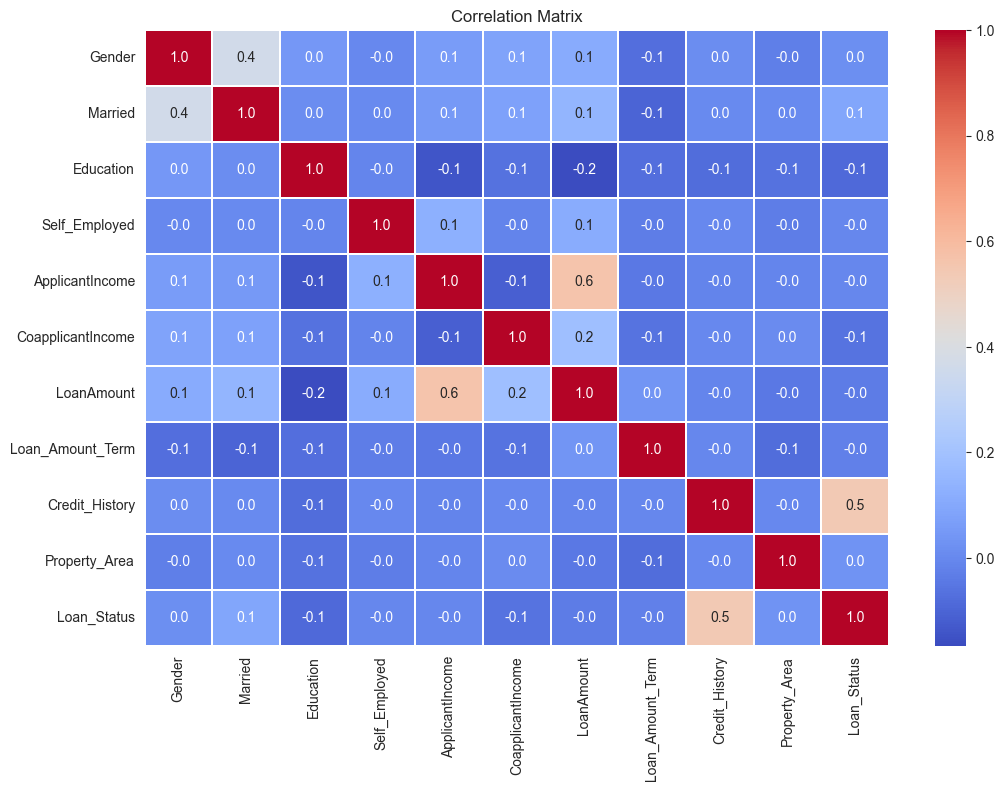

In [90]:


# Identify non-numeric columns (e.g., identifier column)
non_numeric_columns = ['Loan_ID']  # Add your non-numeric column names here

# Select only numeric columns
numeric_columns = loan_train.select_dtypes(include=['number']).columns

# Exclude non-numeric columns from correlation calculation
numeric_data = loan_train[numeric_columns]

# Compute correlation matrix
correlation_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.title('Correlation Matrix')
plt.show()



From the above diagram, Loan Amount and Applicant Income is more correlated with 0.6 value.

Step 7.  ML Modeling

Step 7.1. Extracting Dependent and Independent Variables

In [91]:
loan_features=[
    'Gender',
    'Education',
    'Self_Employed',
    'ApplicantIncome',
    'CoapplicantIncome',
    'LoanAmount',
    'Loan_Amount_Term',
    'Credit_History',
    'Property_Area'
]

In [92]:
X = loan_train[loan_features]
y =loan_train.Loan_Status


Step 7.2. Decision Tree Regressor without model validation 

In [93]:
from sklearn.tree import DecisionTreeRegressor

#Define Model
loan_model = DecisionTreeRegressor(random_state=1)

#Fit model
loan_model.fit(X,y)

DecisionTreeRegressor(random_state=1)

In [94]:
print('loan required columns')
print(X.head())
print('Loan prediction')
print(loan_model.predict(X.head()))

loan required columns
   Gender  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  \
0     1.0          0            0.0             5849                0.0   
1     1.0          0            0.0             4583             1508.0   
2     1.0          0            1.0             3000                0.0   
3     1.0          1            0.0             2583             2358.0   
4     1.0          0            0.0             6000                0.0   

   LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  
0  146.412162             360.0             1.0              2  
1  128.000000             360.0             1.0              0  
2   66.000000             360.0             1.0              2  
3  120.000000             360.0             1.0              2  
4  141.000000             360.0             1.0              2  
Loan prediction
[1. 0. 1. 1. 1.]


In [95]:
loan_train.Loan_Status

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

Step 7.3. Mean Absolute Error

In [96]:
from sklearn.metrics import mean_absolute_error
predicted_loan = loan_model.predict(X)
mean_absolute_error(y, predicted_loan)

0.0

the model we just computed is called 'in sample' score. this is not a perfect prediction of loan status

Step 7.4. Model Validation

In [97]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

Step 7.5. Feature Scaling

In [98]:
from sklearn.preprocessing import StandardScaler
# Feature Scaling
if X_train is None or not hasattr(X_train, '__iter__'):
    raise ValueError("X_train is not defined properly.")
if X_test is None or not hasattr(X_test, '__iter__'):
    raise ValueError("X_test is not defined properly.")

# Assuming the above checks pass, proceed with scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 7.6. Decision Tree Regressor after Model Validation and Feature Scaling

In [99]:
#Defin model
loan_model = DecisionTreeRegressor()

# Fit model
loan_model.fit(X_train, y_train)

#get predicted loan status
test_predictions = loan_model.predict(X_test)

print(mean_absolute_error(y_test, test_predictions))

0.2731707317073171


In [100]:
print('Predicted loan status:',loan_model.predict(X_test.head()))
print('Actual loan status:',y.head().tolist())

Predicted loan status: [0. 1. 1. 0. 1.]
Actual loan status: [1, 0, 1, 1, 1]


Step 7.7. Checking the Accuracy

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#Define model
loan_tree = DecisionTreeClassifier()

#Fit model
loan_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [102]:
#get prediction
loan_pred = loan_tree.predict(X_test)


In [103]:
# Evaluate the predictions
accuracy = accuracy_score(y_test, loan_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7365853658536585


In [104]:
# Print detailed classification report
report = classification_report(y_test, loan_pred)
print(report)

              precision    recall  f1-score   support

           0       0.55      0.55      0.55        60
           1       0.81      0.81      0.81       145

    accuracy                           0.74       205
   macro avg       0.68      0.68      0.68       205
weighted avg       0.74      0.74      0.74       205



Class 0:

Precision: 0.54 - When the model predicts class 0, it is correct 54% of the time.
Recall: 0.43 - The model correctly identifies 43% of the actual class 0 instances.
F1-Score: 0.48 - The balance between precision and recall.
Support: 60 - There are 60 instances of class 0 in the dataset.

Class 1:

Precision: 0.78 - When the model predicts class 1, it is correct 78% of the time.
Recall: 0.85 - The model correctly identifies 85% of the actual class 1 instances.
F1-Score: 0.81 - The balance between precision and recall.
Support: 145 - There are 145 instances of class 1 in the dataset.

Overall Metrics:

Accuracy: 0.73 - The overall accuracy of the model, which is the proportion of correctly predicted instances out of all instances.
Macro Avg:
Precision: 0.66 - The average precision of both classes.
Recall: 0.64 - The average recall of both classes.
F1-Score: 0.65 - The average F1-score of both classes.

Weighted Avg:
Precision: 0.71 - The weighted average precision of both classes, considering the support.
Recall: 0.73 - The weighted average recall of both classes.
F1-Score: 0.72 - The weighted average F1-score of both classes.

In [105]:
# Print confusion matrix
matrix = confusion_matrix(y_test, loan_pred)
print(matrix)

[[ 33  27]
 [ 27 118]]


By above output, we can interpret that 25+122= 147 (Correct Output) and 23+35= 58(Incorrect Output).

In [106]:
             #Predicted Negative    Predicted Positive
             
#Actual Negative      TN                  FP
#Actual Positive      FN                  TP

Structure of Confusion Matrix:
True Positive (TP): The model correctly predicts the positive class.
True Negative (TN): The model correctly predicts the negative class.
False Positive (FP): The model incorrectly predicts the positive class (Type I error).
False Negative (FN): The model incorrectly predicts the negative class (Type II error).

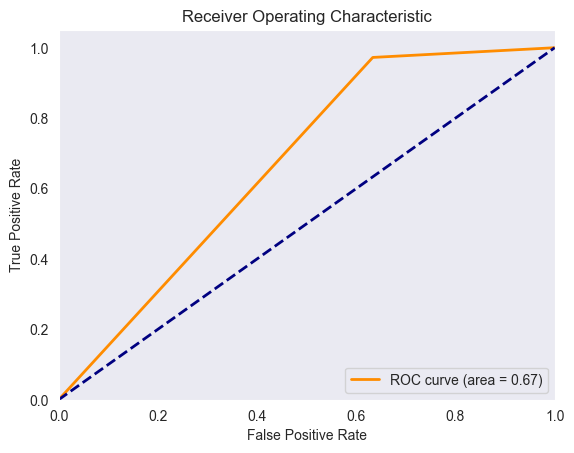

Area Under the Curve (AUC): 0.67


In [120]:
from sklearn.metrics import roc_curve,auc
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')

Step 7.8. Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

#Define model
classifier = LogisticRegression(random_state=0)

#Fit model
classifier.fit(X_train, y_train)

C:\Users\nirok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [110]:
# predicting the test set results
y_pred = classifier.predict(X_test)
print(y_pred)


[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1]


In [111]:

#Creating the Confusion matrix  
cm= confusion_matrix(y_test, y_pred)  
print(cm)



[[ 26  34]
 [  2 143]]


By above output, we can interpret that 26+143= 169 (Correct Output) and 2+34= 36(Incorrect Output).

In [112]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.824390243902439


In [113]:
# Print detailed classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.93      0.43      0.59        60
           1       0.81      0.99      0.89       145

    accuracy                           0.82       205
   macro avg       0.87      0.71      0.74       205
weighted avg       0.84      0.82      0.80       205



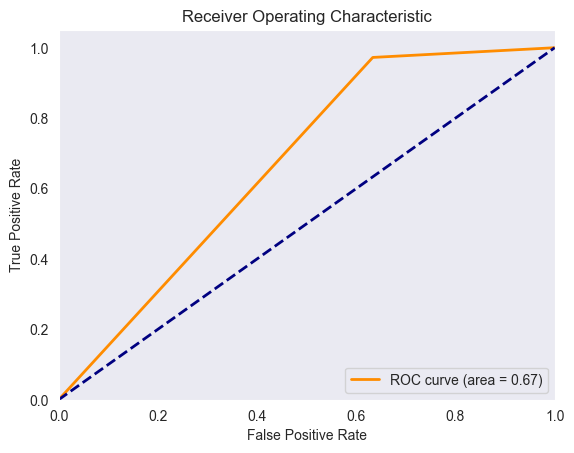

Area Under the Curve (AUC): 0.67


In [121]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')

In [115]:
loan_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1.0,1.0,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1.0,1.0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1.0,1.0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1.0,0.0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1


In [116]:
# Creating a DataFrame with the actual vs predicted values
results_df = X_test.copy()
results_df['Actual'] = y_test.values
results_df['Predicted'] = y_pred

# Displaying the table
print(results_df.head())

     Gender  Education  Self_Employed  ApplicantIncome  CoapplicantIncome  \
454     1.0          0            1.0             7085                0.0   
52      0.0          0            0.0             4230                0.0   
536     1.0          0            0.0             6133             3906.0   
469     1.0          0            0.0             4333             2451.0   
55      1.0          0            0.0             2708             1167.0   

     LoanAmount  Loan_Amount_Term  Credit_History  Property_Area  Actual  \
454        84.0             360.0             1.0              1       1   
52        112.0             360.0             1.0              1       0   
536       324.0             360.0             1.0              2       1   
469       110.0             360.0             1.0              2       0   
55         97.0             360.0             1.0              1       1   

     Predicted  
454          1  
52           1  
536          1  
469         

Step 7.9. Support Vector Machine

In [117]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='linear', random_state=0)  
classifier.fit(X_train, y_train)  

SVC(kernel='linear', random_state=0)

In [118]:
#Predicting the test set result  
y_pred= classifier.predict(X_test)  
print (y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1]


Confusion Matrix

In [122]:
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[ 22  38]
 [  4 141]]


By above output, we can interpret that 22+141= 163 (Correct Output) and 4+38= 42(Incorrect Output).

In [123]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7951219512195122


In [124]:
# Print detailed classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.37      0.51        60
           1       0.79      0.97      0.87       145

    accuracy                           0.80       205
   macro avg       0.82      0.67      0.69       205
weighted avg       0.80      0.80      0.77       205



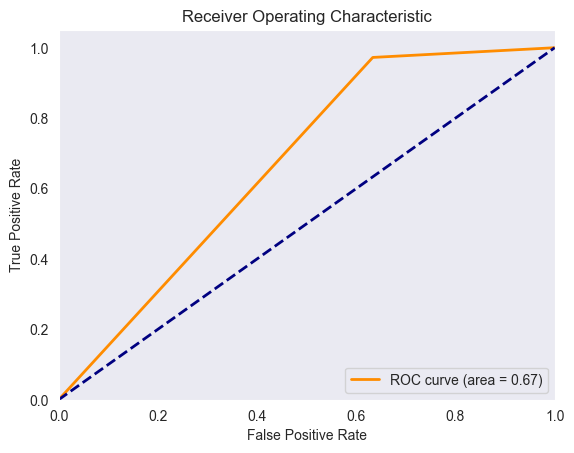

Area Under the Curve (AUC): 0.67


In [125]:
from sklearn.metrics import roc_curve, auc
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print AUC
print(f'Area Under the Curve (AUC): {roc_auc:.2f}')

## Fitting K-NN classifier to the trainning set

In [126]:
from sklearn.neighbors import KNeighborsClassifier

classifier=KNeighborsClassifier(n_neighbors=5, metric= 'minkowski', p=2)
#n_neighbors: To define the required neighbors of the algorithm. Usually, it takes 5.
#metric='minkowski': This is the default parameter and it decides the distance between the points.
#p=2: It is equivalent to the standard Euclidean metric.
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [127]:
#predicting the test set result
y_pred = classifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0
 1 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0
 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1]


In [128]:
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[ 14  46]
 [ 27 118]]


In [129]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6439024390243903


Step 8. Conclusion
From the Logistic Regression ML algorithms the accuracy is 82% where as from Confusion Matrix we get 169 correct output.

In [130]:
from sklearn.svm import SVC #support vector classifier
classifier= SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [131]:
y_pred=classifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1]


In [132]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7951219512195122


In [133]:
cm= confusion_matrix(y_test, y_pred)  
print(cm)

[[ 22  38]
 [  4 141]]


In [134]:
#Fitting Naive Bayes to the Training set  
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train)  

GaussianNB()

In [136]:
y_pred=classifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 1 0 1]


In [138]:
cm = confusion_matrix(y_test, y_pred)  
cm

array([[ 26,  34],
       [  5, 140]], dtype=int64)